# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')
np.random.seed(13)

# Load dataset

In [2]:
X_train = pd.read_csv("/scratch/nathanya.queby/mlpc/train_dataset.csv")
X_train = X_train.drop(['pianist_id', 'segment_id', 'snippet_id'], axis=1)
X_train

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
0,0.192237,0.059404,2.040252,16079768.0,0.800000,0.677256,0.095846,1290.972900,936.912476,30.490740,...,0.077880,0.357389,0.685941,0.809092,-0.092027,0.041443,0.00000,0.169743,0.011449,0.004161
1,0.143425,0.064204,3.138845,35489248.0,2.600000,0.514913,0.092372,1133.526733,286.292847,28.111111,...,0.113479,0.488570,0.911455,0.767972,-0.153564,0.113378,0.00000,0.355861,0.006205,0.003194
2,0.158810,0.059129,3.567908,40922732.0,1.400000,0.596779,0.116061,1076.780151,251.776215,29.354166,...,0.086685,0.481198,0.367500,0.523341,-0.083029,0.053186,0.00002,0.232454,0.007335,0.004063
3,0.168547,0.049648,2.329854,51921612.0,1.600000,0.556160,0.143420,1008.112183,196.336700,29.375000,...,0.115372,0.488982,1.002424,0.376181,-0.172612,0.063815,0.00000,0.140930,0.007345,0.003917
4,0.196514,0.052237,2.566071,66282424.0,2.200000,0.584508,0.100911,1063.062866,184.782257,28.534721,...,0.129901,0.513714,0.582648,0.699472,0.039179,0.088127,0.00000,0.091799,0.009359,0.003582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,0.202177,0.050760,2.840705,51977460.0,1.800000,0.688834,0.090235,866.423889,133.063477,29.842592,...,0.214162,0.682742,0.250832,0.806177,-0.042110,0.145387,0.00000,0.269012,0.014044,0.004991
2049,0.174454,0.063426,5.202462,9471357.0,3.200000,0.661253,0.107627,828.768005,234.908127,30.296297,...,0.092215,0.533371,0.969141,0.861597,-0.290169,0.091809,0.00000,0.353269,0.011126,0.004529
2050,0.161152,0.074724,4.605277,7378860.5,2.600000,0.645111,0.093705,841.285645,226.538666,29.761574,...,0.052282,0.702560,0.256100,0.829834,-0.254077,0.065565,0.00000,0.319188,0.009205,0.004808
2051,0.192846,0.056795,2.563405,22641664.0,3.200000,0.680604,0.094989,716.426025,181.553772,29.881945,...,0.178608,0.607663,0.255105,0.483378,-0.079091,0.188159,0.00000,0.133573,0.013538,0.004881


In [3]:
y_train = pd.read_csv("/scratch/nathanya.queby/mlpc/train_targets.csv", header=None)
y_train = y_train[0].values.astype("int64")
print(y_train.shape)
y_train

(2053,)


array([3, 3, 3, ..., 1, 1, 1])

In [4]:
X_test = pd.read_csv("/scratch/nathanya.queby/mlpc/test_dataset.csv")
X_test = X_test.drop(['pianist_id', 'segment_id', 'snippet_id'], axis=1)
X_test

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,mirtoolbox_hcdf_pct_10,mirtoolbox_hcdf_pct_90,mirtoolbox_irregularity,mirtoolbox_keyclarity,mirtoolbox_mode,mirtoolbox_novelty_mean,mirtoolbox_novelty_pct_10,mirtoolbox_pulseclarity,mirtoolbox_roughness_mean,mirtoolbox_roughness_std
0,0.146967,0.056205,2.019706,42130144.0,2.600000,0.560116,0.115359,1050.947632,181.327225,28.354166,...,0.126654,0.493207,0.740554,0.655391,-0.002827,0.143144,0.000000,0.209162,0.007467,0.003986
1,0.195762,0.054038,1.650751,65885464.0,4.373398,0.576964,0.095918,1104.464722,413.591125,27.740311,...,0.154411,0.455670,0.447020,0.661684,0.074573,0.141053,0.000000,0.149663,0.011406,0.003618
2,0.225943,0.058967,1.339994,156672624.0,3.000000,0.648186,0.087664,1066.024902,157.144470,29.175926,...,0.139321,0.470631,0.274534,0.675268,-0.280677,0.081721,0.000000,0.133185,0.015127,0.004930
3,0.169778,0.065160,4.615561,67287496.0,1.852280,0.607226,0.102608,1074.738159,471.420258,28.938503,...,0.130897,0.472980,0.736538,0.813011,0.207040,0.069847,0.000000,0.110838,0.011128,0.006774
4,0.226559,0.065521,1.705109,100496784.0,3.400000,0.621009,0.092719,1254.885254,199.422180,28.270834,...,0.139423,0.442981,0.426168,0.781752,0.157758,0.094246,0.000000,0.157236,0.014241,0.004307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.142812,0.065007,2.547269,16216005.0,3.000000,0.555797,0.126262,783.319885,152.581253,27.655092,...,0.090617,0.473097,0.836046,0.926008,0.099228,0.035435,0.000009,0.116657,0.008016,0.004037
225,0.161294,0.059252,2.995837,29173024.0,3.400000,0.600145,0.110782,696.067627,170.105576,28.902779,...,0.199239,0.552169,0.379475,0.636458,-0.029950,0.153426,0.000000,0.185843,0.009054,0.004111
226,0.265052,0.099702,1.549239,35251556.0,3.400000,0.610611,0.109219,1216.717407,287.146179,28.847221,...,0.158637,0.476680,0.403751,0.652105,0.127109,0.110063,0.004220,0.127996,0.018429,0.007174
227,0.170429,0.064642,3.810143,13938461.0,2.000000,0.669719,0.075449,893.238342,151.110596,27.055555,...,0.045320,0.639122,0.263926,0.744871,0.236403,0.097617,0.000000,0.156304,0.008120,0.005910


In [5]:
y_test = pd.read_csv("/scratch/nathanya.queby/mlpc/test_targets.csv", header=None)
y_test = y_test[0].values.astype("int64")
print(y_test.shape)
y_test

(229,)


array([3, 1, 3, 4, 4, 3, 3, 2, 2, 3, 2, 4, 3, 3, 3, 1, 1, 4, 3, 3, 2, 2,
       2, 2, 4, 1, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 3, 1, 3, 4, 4, 4, 3, 1,
       4, 3, 3, 2, 4, 4, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       2, 3, 4, 2, 1, 1, 4, 4, 3, 2, 2, 2, 3, 3, 3, 1, 4, 4, 4, 4, 4, 2,
       1, 1, 1, 1, 4, 4, 3, 3, 3, 2, 2, 3, 4, 3, 4, 4, 3, 4, 4, 1, 4, 4,
       4, 4, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 3, 4, 4, 4, 4, 1, 1, 2, 1, 3,
       3, 2, 4, 4, 1, 1, 4, 4, 1, 4, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 2, 3, 2, 3, 3, 3,
       3, 3, 4, 4, 1, 1, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 2, 3,
       4, 1, 1, 1, 4, 4, 3, 3, 3, 1, 4, 1, 1, 4, 4, 4, 4, 4, 2, 2, 3, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 4])

# Train models

In [6]:
models = [
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier()),
          ('ADA', AdaBoostClassifier()),
          ('GTB', GradientBoostingClassifier())
        ]

In [7]:
dfs = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
target_names = ["1", "2", "3", "4"]

RF
              precision    recall  f1-score   support

           1       0.40      0.41      0.40        49
           2       0.46      0.51      0.48        43
           3       0.53      0.41      0.46        64
           4       0.56      0.63      0.59        73

    accuracy                           0.50       229
   macro avg       0.49      0.49      0.49       229
weighted avg       0.50      0.50      0.50       229

[[20  6  5 18]
 [ 9 22  9  3]
 [10 13 26 15]
 [11  7  9 46]]
KNN
              precision    recall  f1-score   support

           1       0.32      0.39      0.35        49
           2       0.29      0.23      0.26        43
           3       0.34      0.39      0.36        64
           4       0.40      0.33      0.36        73

    accuracy                           0.34       229
   macro avg       0.34      0.33      0.33       229
weighted avg       0.34      0.34      0.34       229

[[19  8 11 11]
 [12 10 16  5]
 [13  6 25 20]
 [16 11 22 24]]
S

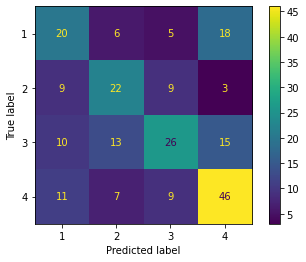

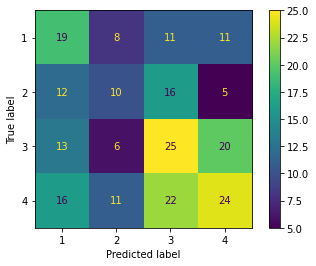

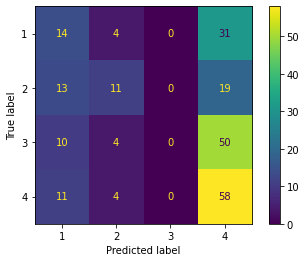

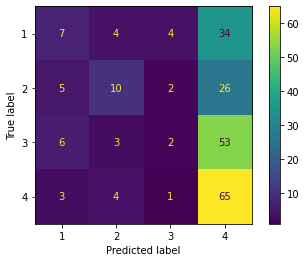

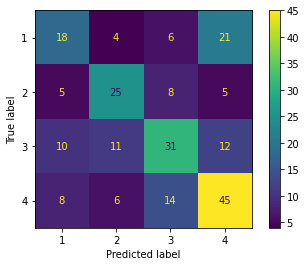

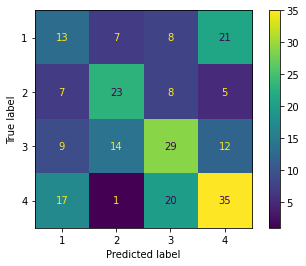

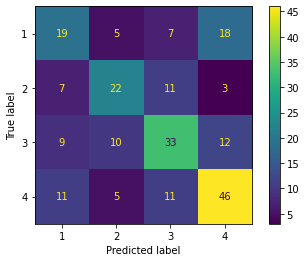

In [8]:
for name, model in models:
    cv_results = model_selection.cross_validate(model, X_train, y_train, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    print(confusion_matrix(y_test, y_pred))
    plot_confusion_matrix(clf, X_test, y_test)

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

    final = pd.concat(dfs, ignore_index=True)

# Evaluate results

In [9]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

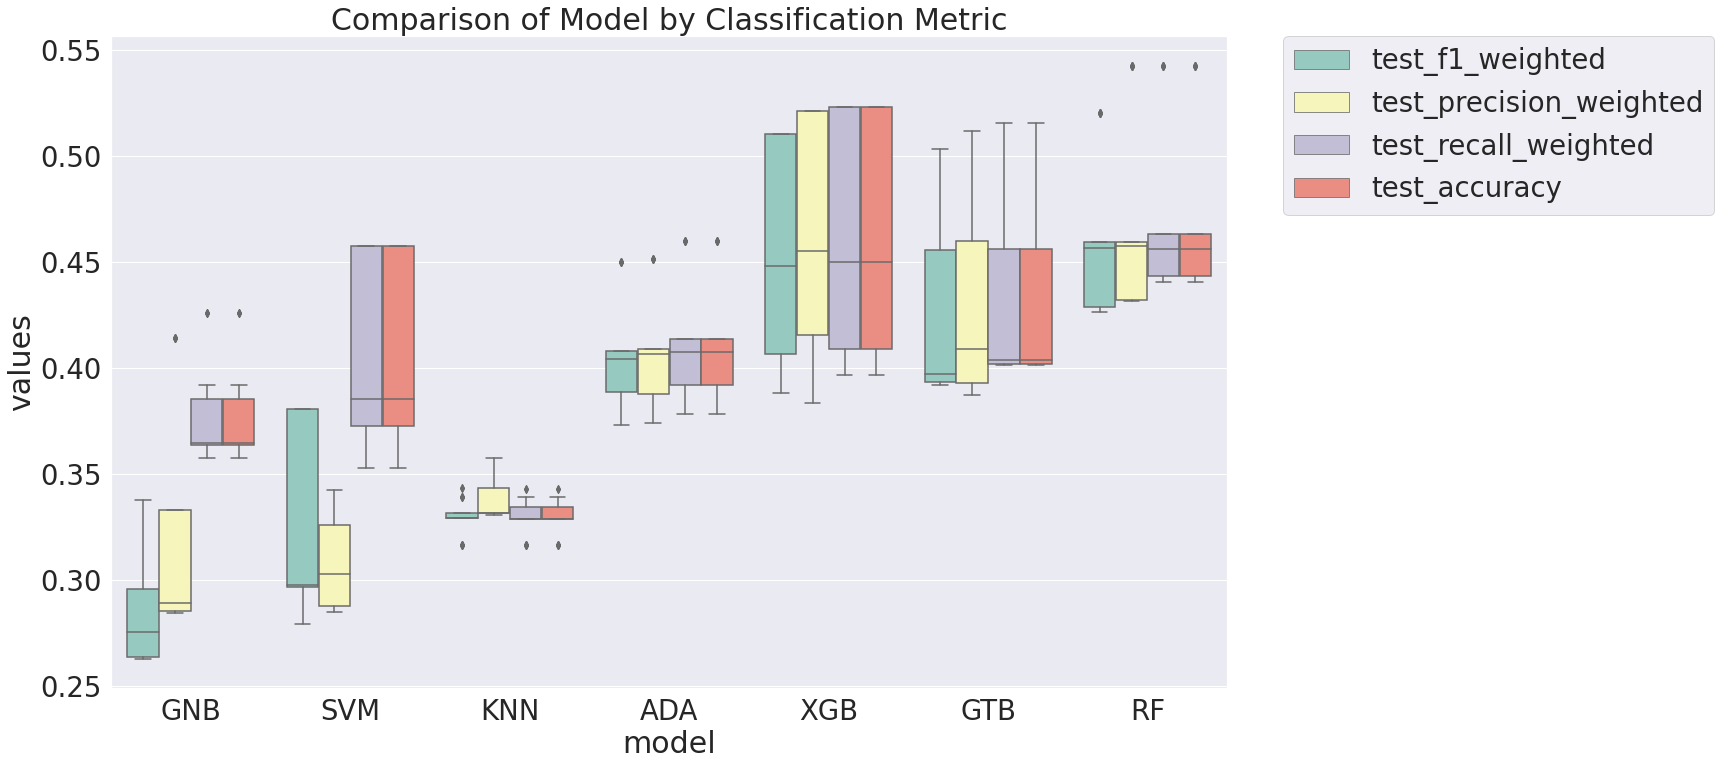

In [10]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [11]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_f1_weighted           test_precision_weighted            \
                   std      mean                     std      mean   
model                                                                
ADA           0.023670  0.404749                0.024131  0.405807   
GNB           0.023076  0.282177                0.047508  0.318865   
GTB           0.039103  0.422897                0.041417  0.426786   
KNN           0.007481  0.329720                0.009271  0.337652   
RF            0.036204  0.459778                0.044557  0.465880   
SVM           0.040684  0.322289                0.023107  0.308600   
XGB           0.051932  0.450679                0.055730  0.456197   

      test_accuracy           test_recall_weighted            
                std      mean                  std      mean  
model                                                         
ADA        0.025570  0.409374             0.025570  0.409374  
GNB        0.021044  0.373598             0.021044  0.373598  
GTB        0.039555  0.429471             0.039555  0.429471  
KNN        0.007707  0.329767             0.007707  0.329767  
RF         0.040124  0.472355             0.040124  0.472355  
SVM        0.040256  0.403635             0.040256  0.403635  
XGB        0.053759  0.457129             0.053759  0.457129

In [12]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time           
             std      mean       std       mean
model                                          
ADA     0.000585  0.012801  0.003757   0.794655
GNB     0.000187  0.003615  0.001091   0.003492
GTB     0.000669  0.006697  0.013000  13.511267
KNN     0.003784  0.063500  0.000297   0.002334
RF      0.001224  0.015695  0.012335   0.795727
SVM     0.001044  0.065320  0.004863   0.198047
XGB     0.000945  0.009964  0.341023   3.232029

# SVM

In [13]:
param_grid = {'C': [0.1, 1, 10, 100],
            'gamma': [1, 0.1, 0.01, 0.001],
            'kernel': ['poly']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

print(grid.best_params_)
print(grid.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.319 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.319 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.321 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.320 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.320 total time=   0.0s


In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 0  0  0 49]
 [ 0  0  0 43]
 [ 0  0  0 64]
 [ 0  0  0 73]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        64
           4       0.32      1.00      0.48        73

    accuracy                           0.32       229
   macro avg       0.08      0.25      0.12       229
weighted avg       0.10      0.32      0.15       229



# XGBoost

In [13]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [14]:
dmatrix = xgb.DMatrix(X_train,y_train)

params={'objective':'reg:squarederror'}
cv_results = xgb.cv(dtrain=dmatrix,
                    params=params,
                    metrics={'f1'},
                    as_pandas=True,
                    seed=13)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

XGBoostError: [20:01:14] /workspace/src/metric/metric.cc:23: Unknown metric function f1
Stack trace:
  [bt] (0) /iarai/home/nathanya.queby/.local/lib/python3.9/site-packages/xgboost/./lib/libxgboost.so(xgboost::Metric::Create(std::string const&)+0x62d) [0x7f963afe0ebd]
  [bt] (1) /iarai/home/nathanya.queby/.local/lib/python3.9/site-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::Configure(std::vector<std::pair<std::string, std::string>, std::allocator<std::pair<std::string, std::string> > > const&)+0x12d1) [0x7f963afc4041]
  [bt] (2) /iarai/home/nathanya.queby/.local/lib/python3.9/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x76) [0x7f963af29ae6]
  [bt] (3) /usr/lib/x86_64-linux-gnu/libffi.so.8(+0x79da) [0x7f9716b059da]
  [bt] (4) /usr/lib/x86_64-linux-gnu/libffi.so.8(+0x6b21) [0x7f9716b04b21]
  [bt] (5) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x13340) [0x7f97162b5340]
  [bt] (6) /usr/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x98d0) [0x7f97162ab8d0]
  [bt] (7) /usr/bin/python3(_PyObject_MakeTpCall+0x39b) [0x51df8b]
  [bt] (8) /usr/bin/python3(_PyEval_EvalFrameDefault+0x5a55) [0x517b45]



In [15]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.001, 0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}

xgbr = xgb.XGBClassifier(seed = 13)
xgbb = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='f1_weighted', 
                   verbose=2,
                   n_jobs=20)

xgbb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=3, n_estimators=100; total time=  16.8s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=3, n_estimators=100; total time=  17.3s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=3, n_estimators=100; total time=  17.2s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=3, n_estimators=100; total time=  17.3s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=3, n_estimators=100; total time=  17.4s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=6, n_estimators=100; total time=  19.5s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=6, n_estimators=100; total time=  19.5s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=6, n_estimators=100; total time=  19.6s
[CV] END colsample_bytree=0.3, learning_rate=0.001, max_depth=6, n_estimators=100; total time=  19.6s
[CV] END colsample_b

GridSearchCV(estimator=XGBClassifier(seed=13), n_jobs=20,
             param_grid={'colsample_bytree': [0.3, 0.7],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_weighted', verbose=2)

In [16]:
print("Best parameters:", xgbb.best_params_)
print("Lowest RMSE: ", xgbb.best_score_)

Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Lowest RMSE:  0.46093614368304214


In [17]:
y_pred = xgbb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.42      0.35      0.38        49
           2       0.51      0.60      0.55        43
           3       0.56      0.47      0.51        64
           4       0.63      0.73      0.68        73

    accuracy                           0.55       229
   macro avg       0.53      0.54      0.53       229
weighted avg       0.54      0.55      0.54       229



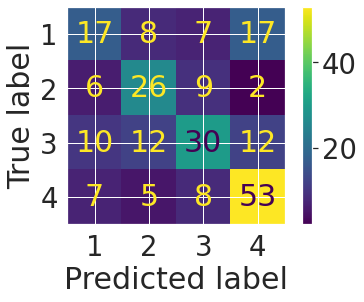

In [18]:
print(plot_confusion_matrix(xgbb, X_test, y_test))

here

GTB
              precision    recall  f1-score   support

           1       0.48      0.43      0.45        49
           2       0.50      0.53      0.52        43
           3       0.53      0.45      0.49        64
           4       0.56      0.64      0.60        73

    accuracy                           0.52       229
   macro avg       0.52      0.52      0.51       229
weighted avg       0.52      0.52      0.52       229

[[21  5  4 19]
 [ 8 23  9  3]
 [ 8 12 29 15]
 [ 7  6 13 47]]
[[21  5  4 19]
 [ 8 23  9  3]
 [ 8 12 29 15]
 [ 7  6 13 47]]


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

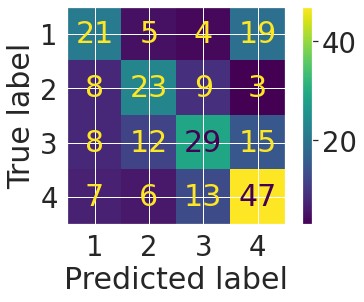

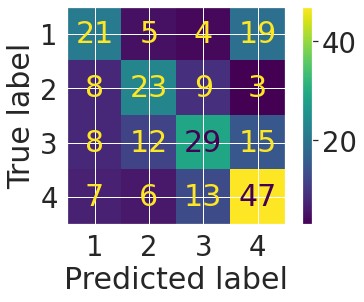

In [19]:
# cv_results = model_selection.cross_validate(xgbb, X_train, y_train, scoring="f1_weighted")

# dmatrix = xgbb.DMatrix(X_train,y_train)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

params={'colsample_bytree': 0.3, 'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 500}
xgbbb = xgb.XGBClassifier(colsample_bytree=0.3, learning_rate=0.001, max_depth=10, n_estimators=500, seed=13, )
cv_results = model_selection.cross_validate(xgbbb, X_train, y_train,
                    scoring=scoring)

xgbbb = xgbbb.fit(X_train, y_train)
y_pred = xgbbb.predict(X_test)
print(name)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(xgbbb, X_test, y_test)

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(xgbbb, X_test, y_test)

this_df = pd.DataFrame(cv_results)
this_df['model'] = "XGB_tuned"

# final = pd.concat(this_df, ignore_index=True)

In [20]:
this_df

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,model
0,18.909339,0.144026,0.447689,0.426440,0.447689,0.430730,XGB_tuned
1,18.792530,0.138667,0.425791,0.425320,0.425791,0.414826,XGB_tuned
2,18.911659,0.138653,0.540146,0.539268,0.540146,0.520380,XGB_tuned
3,18.812756,0.142459,0.475610,0.478324,0.475610,0.476551,XGB_tuned
4,18.758592,0.138197,0.448780,0.446506,0.448780,0.440528,XGB_tuned


In [21]:
bootstraps = []
model = "XGB_tuned"
model_df = this_df.loc[this_df.model == model]
bootstrap = model_df.sample(n=30, replace=True)
bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [22]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_f1_weighted           test_precision_weighted           \
                       std      mean                     std     mean   
model                                                                   
XGB_tuned         0.033885  0.446371                0.038745  0.45113   

          test_accuracy           test_recall_weighted            
                    std      mean                  std      mean  
model                                                             
XGB_tuned      0.035131  0.458684             0.035131  0.458684

In [23]:
testtt = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
testtt = testtt[["test_accuracy", "test_precision_weighted", "test_recall_weighted", "test_f1_weighted"]]

In [24]:
testtt

test_accuracy           test_precision_weighted           \
                    std      mean                     std     mean   
model                                                                
XGB_tuned      0.035131  0.458684                0.038745  0.45113   

          test_recall_weighted           test_f1_weighted            
                           std      mean              std      mean  
model                                                                
XGB_tuned             0.035131  0.458684         0.033885  0.446371

In [25]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time           
                 std      mean       std       mean
model                                              
XGB_tuned   0.002661  0.140721  0.067132  18.841454

# AdaBoost

In [26]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=13,),random_state=13,)

parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]}

adaa = GridSearchCV(abc, parameters, verbose=3, scoring="f1_weighted", n_jobs=30)
adaa.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 3/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.366 total time=   0.3s
[CV 4/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.402 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.390 total time=   0.3s
[CV 5/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.324 total time=   0.3s
[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.01, n_estimators=10;, score=0.381 total time=   0.4s
[CV 2/5] END base_estimator__max_depth=2, base_estimator__min_samples_leaf=5, learning_rate=0.1, n_estimators=10;, score=0.376 total time=   0.3s
[CV 1/5] END base_estimator__max_depth=2, base_estimator_

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=13),
                                          random_state=13),
             n_jobs=30,
             param_grid={'base_estimator__max_depth': [2, 4, 6, 8, 10],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='f1_weighted', verbose=3)

In [27]:
print("Best parameters:", adaa.best_params_)
print("Lowest RMSE: ", adaa.best_score_)

Best parameters: {'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.01, 'n_estimators': 50}
Lowest RMSE:  0.4530631414383583


In [28]:
y_pred = adaa.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.39      0.43        49
           2       0.50      0.58      0.54        43
           3       0.54      0.44      0.48        64
           4       0.53      0.64      0.58        73

    accuracy                           0.52       229
   macro avg       0.51      0.51      0.51       229
weighted avg       0.52      0.52      0.51       229



[[19  6  4 20]
 [ 5 25 10  3]
 [ 7 11 28 18]
 [ 8  8 10 47]]


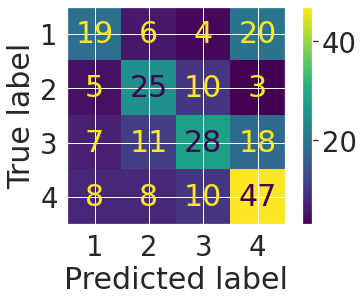

In [29]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(adaa, X_test, y_test)

here

In [30]:
this_df

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,model
0,18.909339,0.144026,0.447689,0.426440,0.447689,0.430730,XGB_tuned
1,18.792530,0.138667,0.425791,0.425320,0.425791,0.414826,XGB_tuned
2,18.911659,0.138653,0.540146,0.539268,0.540146,0.520380,XGB_tuned
3,18.812756,0.142459,0.475610,0.478324,0.475610,0.476551,XGB_tuned
4,18.758592,0.138197,0.448780,0.446506,0.448780,0.440528,XGB_tuned


GTB
              precision    recall  f1-score   support

           1       0.42      0.43      0.42        49
           2       0.50      0.42      0.46        43
           3       0.55      0.45      0.50        64
           4       0.53      0.66      0.59        73

    accuracy                           0.51       229
   macro avg       0.50      0.49      0.49       229
weighted avg       0.51      0.51      0.50       229

[[21  5  5 18]
 [ 9 18  9  7]
 [11  7 29 17]
 [ 9  6 10 48]]
[[21  5  5 18]
 [ 9 18  9  7]
 [11  7 29 17]
 [ 9  6 10 48]]


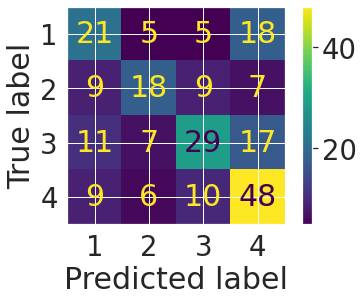

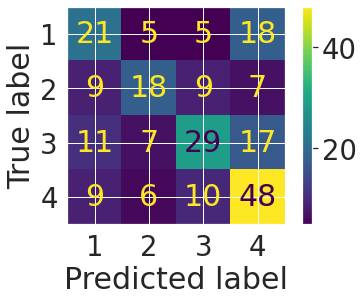

In [31]:
# cv_results = model_selection.cross_validate(xgbb, X_train, y_train, scoring="f1_weighted")

# dmatrix = xgbb.DMatrix(X_train,y_train)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

adaaa = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=13, max_depth=6, min_samples_leaf=5),random_state=13, learning_rate=0.1, n_estimators=1000)
cv_results = model_selection.cross_validate(adaaa, X_train, y_train,
                    scoring=scoring)

adaaa = adaaa.fit(X_train, y_train)
y_pred = adaaa.predict(X_test)
print(name)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(adaaa, X_test, y_test)

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(adaaa, X_test, y_test)

this_df = pd.DataFrame(cv_results)
this_df['model'] = "ADA_tuned"

# final = pd.concat(this_df, ignore_index=True)

In [32]:
bootstraps = []
model = "ADA_tuned"
model_df = this_df.loc[this_df.model == model]
bootstrap = model_df.sample(n=30, replace=True)
bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [33]:
metrics = list(set(results_long_nofit.metrics.values))
testtt = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
testtt = testtt[["test_accuracy", "test_precision_weighted", "test_recall_weighted", "test_f1_weighted"]]
testtt

test_accuracy           test_precision_weighted           \
                    std      mean                     std     mean   
model                                                                
ADA_tuned      0.038581  0.467306                0.040757  0.46757   

          test_recall_weighted           test_f1_weighted            
                           std      mean              std      mean  
model                                                                
ADA_tuned             0.038581  0.467306         0.040062  0.458762

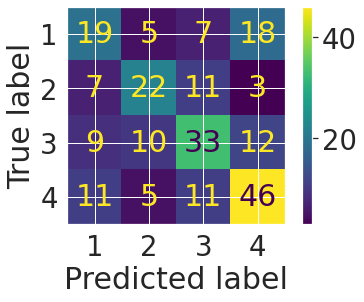

In [34]:
plot_confusion_matrix(clf, X_test, y_test)

# RF

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=13, n_jobs = 40)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   4.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   4.1s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=40,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=13, verbose=2)

In [45]:
print("Best parameters:", rf_random.best_params_)
print("Lowest RMSE: ", rf_random.best_score_)

Best parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}
Lowest RMSE:  0.4525220187532904


In [46]:
y_pred = rf_random.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.45      0.46        49
           2       0.51      0.56      0.53        43
           3       0.59      0.47      0.52        64
           4       0.56      0.66      0.61        73

    accuracy                           0.54       229
   macro avg       0.54      0.53      0.53       229
weighted avg       0.54      0.54      0.54       229



[[22  5  4 18]
 [ 7 24  8  4]
 [ 8 11 30 15]
 [ 9  7  9 48]]


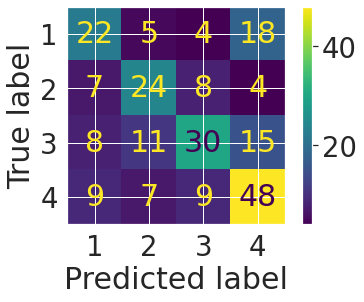

In [47]:
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rf_random, X_test, y_test)

GTB
              precision    recall  f1-score   support

           1       0.49      0.47      0.48        49
           2       0.51      0.53      0.52        43
           3       0.54      0.48      0.51        64
           4       0.59      0.64      0.61        73

    accuracy                           0.54       229
   macro avg       0.53      0.53      0.53       229
weighted avg       0.54      0.54      0.54       229

[[23  4  6 16]
 [ 7 23  9  4]
 [ 9 11 31 13]
 [ 8  7 11 47]]


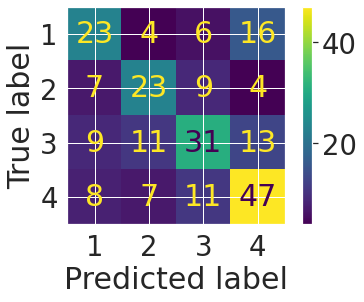

In [49]:
# cv_results = model_selection.cross_validate(xgbb, X_train, y_train, scoring="f1_weighted")

# dmatrix = xgbb.DMatrix(X_train,y_train)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

rff = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features="auto", max_depth=90, bootstrap=True)
cv_results = model_selection.cross_validate(rff, X_train, y_train,
                    scoring=scoring)

rff = rff.fit(X_train, y_train)
y_pred = rff.predict(X_test)
print(name)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(rff, X_test, y_test)

this_df = pd.DataFrame(cv_results)
this_df['model'] = "RF_tuned"

# final = pd.concat(this_df, ignore_index=True)

In [50]:
bootstraps = []
model = "RF_tuned"
model_df = this_df.loc[this_df.model == model]
bootstrap = model_df.sample(n=30, replace=True)
bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [51]:
metrics = list(set(results_long_nofit.metrics.values))
testtt = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
testtt = testtt[["test_accuracy", "test_precision_weighted", "test_recall_weighted", "test_f1_weighted"]]
testtt

test_accuracy           test_precision_weighted            \
                   std      mean                     std      mean   
model                                                                
RF_tuned      0.033234  0.455683                0.036323  0.449926   

         test_recall_weighted           test_f1_weighted            
                          std      mean              std      mean  
model                                                               
RF_tuned             0.033234  0.455683          0.03333  0.446508

Source

<!-- @software{reback2020pandas,
    author       = {The pandas development team},
    title        = {pandas-dev/pandas: Pandas},
    month        = feb,
    year         = 2020,
    publisher    = {Zenodo},
    version      = {latest},
    doi          = {10.5281/zenodo.3509134},
    url          = {https://doi.org/10.5281/zenodo.3509134}
} -->